# Clutering - Basic Example

In [35]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [3]:
#Options
pd.set_option('display.max_columns', 500, 'display.width', 1000)

In [ ]:
#import addl libraries

In [7]:
# Distance between numbers
print(3-1)

2


In [9]:
d1, d2, d3, d4 = (2-1), (3-1) , (7-1), (-1 - 1)
print(d1, d2, d3, d4)

1 2 6 -2


In [10]:
#which numbers are closer to 1
#2, 3, -1

In [68]:
#values represented by 2 coordinates x, y
m = ['Mandakini', 23, 150, 0]  # age, height, gender
c = ['Catherine', 21, 154, 0]
a = ['Akshay', 25, 160, 1]
k = ['Amit', 24, 170, 1]
rownames = ['m','c','a','k']
#form 2 groups by closeness
print(m, c, a, k)

['Mandakini', 23, 150, 0] ['Catherine', 21, 154, 0] ['Akshay', 25, 160, 1] ['Amit', 24, 170, 1]


In [69]:
data = [m,c,a, k]
df = pd.DataFrame(data, columns=['name', 'age','height','gender'], index=rownames)
df

,name,age,height,gender
m,Mandakini,23,150,0
c,Catherine,21,154,0
a,Akshay,25,160,1
k,Amit,24,170,1


In [70]:
df1 = df.drop(columns='name').copy()
df1
#remove name - cannot differentiate with name

,age,height,gender
m,23,150,0
c,21,154,0
a,25,160,1
k,24,170,1


In [71]:
#distance
from scipy.spatial import distance
ed1 = distance.euclidean(u=[23,150,0],v=[21,154,0])
print(ed1)

4.47213595499958


In [72]:
print(distance.euclidean(u=[23], v=[21]))
print(math.sqrt((23-21)*2))
print(np.linalg.norm(23-21))

2.0
2.0
2.0


In [73]:
print(distance.euclidean(u=[23,150], v=[21,154])) #m&c with 2 cols
print(distance.euclidean(u=[23,150,0], v=[24,170,1])) #m&k with 3 cols

4.47213595499958
20.049937655763422


In [74]:
from scipy.spatial.distance import cdist
ed_df1 = np.around(cdist(df1, df1, 'euclid'), 1)
ed_df1

array([[ 0. ,  4.5, 10.2, 20. ],
       [ 4.5,  0. ,  7.3, 16.3],
       [10.2,  7.3,  0. , 10. ],
       [20. , 16.3, 10. ,  0. ]])

In [75]:
df1_ed = pd.DataFrame(ed_df1, index=rownames)
df1_ed
# ed betw 0 and 3 is 20
#which 2 are closed - 0 & 1

,0,1,2,3
m,0.0,4.5,10.2,20.0
c,4.5,0.0,7.3,16.3
a,10.2,7.3,0.0,10.0
k,20.0,16.3,10.0,0.0


In [76]:
#see them visually
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [77]:
linkage_data = linkage(df1.values, method='ward', metric='euclidean')
linkage_data

array([[ 0.        ,  1.        ,  4.47213595,  2.        ],
       [ 2.        ,  4.        ,  9.93310962,  3.        ],
       [ 3.        ,  5.        , 18.83702029,  4.        ]])

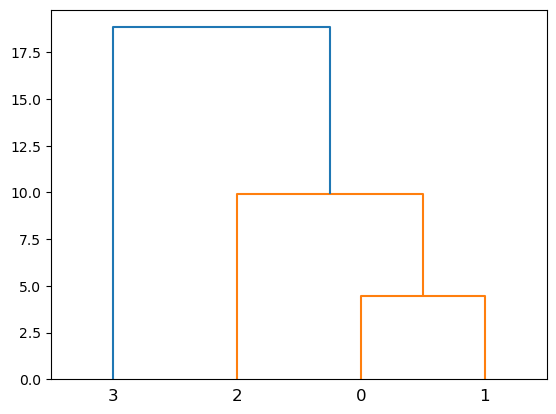

In [78]:
dendrogram(linkage_data)
plt.show()

In [147]:
#how many groups
#1, 2, 3
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [148]:
n=2
km_c2 = KMeans(n_clusters=n, n_init=10)

In [149]:
km_c2.fit(df1)

KMeans(n_clusters=2, n_init=10)

In [150]:
km_c2.cluster_centers_

array([[ 23.        , 154.66666667,   0.33333333,   0.        ,
          0.66666667],
       [ 24.        , 170.        ,   1.        ,   1.        ,
          0.        ]])

In [118]:
#', '. join(dir(km_c2))

In [151]:
km_c2.inertia_

60.0

In [95]:
km_c2.labels_

array([0, 0, 0, 1])

In [96]:
df1['group1'] = km_c2.labels_
df1

,age,height,gender,group1
m,23,150,0,0
c,21,154,0,0
a,25,160,1,0
k,24,170,1,1


In [98]:
# groupby means
df1.groupby('group1', as_index=False).agg('mean')

,group1,age,height,gender
0,0,23.0,154.666667,0.333333
1,1,24.0,170.000000,1.000000


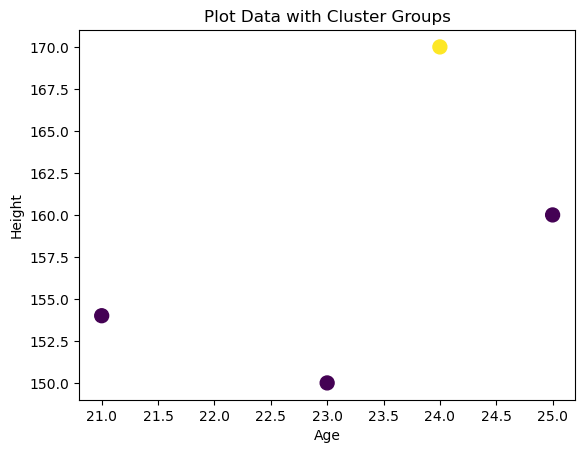

In [101]:
#plot
plt.title('Plot Data with Cluster Groups')
plt.xlabel('Age')
plt.ylabel('Height')
plt.scatter(x='age', y='height', data=df1, s=100, c='group1')
plt.show();

In [ ]:
#Scaling

In [79]:
# However some values have larger range
df1.describe()

,age,height,gender
count,4.000000,4.000000,4.00000
mean,23.250000,158.500000,0.50000
std,1.707825,8.698659,0.57735
min,21.000000,150.000000,0.00000
25%,22.500000,153.000000,0.00000
50%,23.500000,157.000000,0.50000
75%,24.250000,162.500000,1.00000
max,25.000000,170.000000,1.00000


In [80]:
df1.agg(['min','max'])

,age,height,gender
min,21,150,0
max,25,170,1


In [81]:
df1.agg(['min','max']).diff()
#height 20, which make difference to closeness, lets scale them

,age,height,gender
min,NaN,NaN,NaN
max,4.0,20.0,1.0


In [106]:
from sklearn import preprocessing
minMaxScale = preprocessing.MinMaxScaler()
minMaxScale

MinMaxScaler()

In [104]:
df1

,age,height,gender,group1
m,23,150,0,0
c,21,154,0,0
a,25,160,1,0
k,24,170,1,1


In [124]:
df2_values = df1[['age','height','gender']].values
df2_values

array([[ 23, 150,   0],
       [ 21, 154,   0],
       [ 25, 160,   1],
       [ 24, 170,   1]], dtype=int64)

In [125]:
df2_scale = minMaxScale.fit_transform(df2_values)
df2_scale

array([[0.5 , 0.  , 0.  ],
       [0.  , 0.2 , 0.  ],
       [1.  , 0.5 , 1.  ],
       [0.75, 1.  , 1.  ]])

In [126]:
df2 = pd.DataFrame(df2_scale, columns = ['age','height','gender'])
df2

,age,height,gender
0,0.50,0.0,0.0
1,0.00,0.2,0.0
2,1.00,0.5,1.0
3,0.75,1.0,1.0


In [127]:
df2.agg(['min','max'])
#all values between 0 and 1

,age,height,gender
min,0.0,0.0,0.0
max,1.0,1.0,1.0


In [133]:
n=2
km_c2s = KMeans(n_clusters=n, n_init=10)

In [134]:
km_c2s.fit(df2)

KMeans(n_clusters=2, n_init=10)

In [135]:
km_c2s.labels_

array([1, 1, 0, 0])

In [136]:
df1['group2'] = km_c2s.labels_
df1

,age,height,gender,group1,group2
m,23,150,0,0,1
c,21,154,0,0,1
a,25,160,1,0,0
k,24,170,1,1,0


In [138]:
# groupby means
df1.drop(columns='group2'). groupby('group1', as_index=False).agg('mean')

,group1,age,height,gender
0,0,23.0,154.666667,0.333333
1,1,24.0,170.000000,1.000000


In [139]:
# groupby means
df1.drop(columns='group1').groupby('group2', as_index=False).agg('mean')

,group2,age,height,gender
0,0,24.5,165.0,1.0
1,1,22.0,152.0,0.0


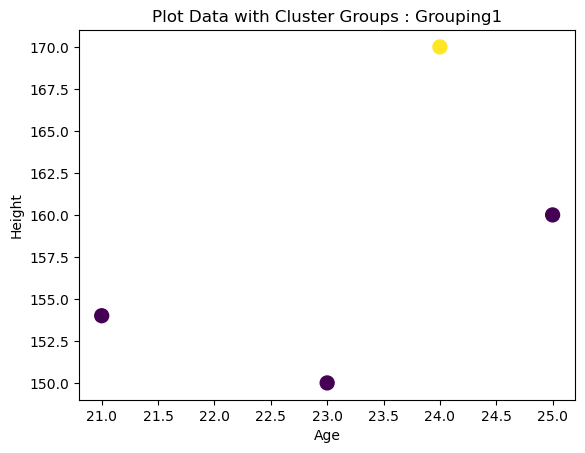

In [141]:
#plot
plt.title('Plot Data with Cluster Groups : Grouping1')
plt.xlabel('Age')
plt.ylabel('Height')
plt.scatter(x='age', y='height', data=df1, s=100, c='group1')
plt.show();

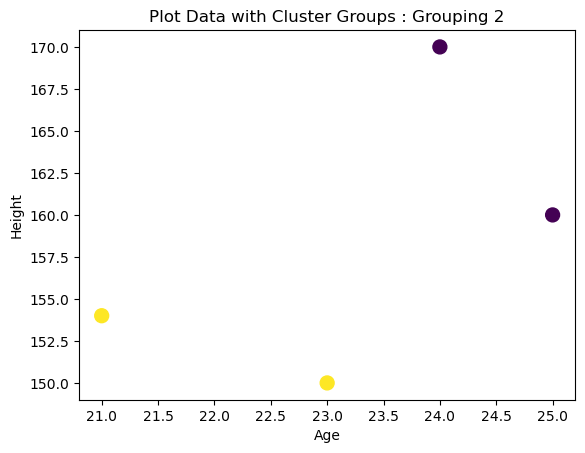

In [142]:
#plot
plt.title('Plot Data with Cluster Groups : Grouping 2')
plt.xlabel('Age')
plt.ylabel('Height')
plt.scatter(x='age', y='height', data=df1, s=100, c='group2')
plt.show();

In [154]:
print('SSE/ Inertia - grouping 1', km_c2.inertia_)
print('SSE/ Inertia - grouping 2', km_c2s.inertia_)

SSE/ Inertia - grouping 1 60.0
SSE/ Inertia - grouping 2 0.30125


# end here
-  How to find right no of clusters
-  How to encode category data eg Male, Female
-  How to plot dendrogram and select groups from it